In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

### From google reviews:

In [2]:
# Load the dataset
df = pd.read_csv("Purolatorgooglereviews_cleaned.csv")
df = df.rename(columns = {'review-full-text':'Reviews'})
df["Source"] = "Google reviews"
df = df.dropna()
df.head(3)

,Reviews,Source
0,The person working at the purolator here took my item after I left it to be returned to amazon (its been a week and amazon didn't get it back yet). I forget her name but I highly recommend NOT USING THIS LOCATION.Caio Uechi in the reviews posted her picture. How she still has a job here is beyond me.,Google reviews
1,"This Purolator drop off counter is located inside the Staples downtown Toronto at 375 University ave. The lady at the counter who took my Amazon return box was quite pleasant, and even though at the time of drop-off, the staff at this location don't scan return parcels or give a receipt as proof they have received your return parcel, the lady assured me that Purolator picks up parcels at 5pm.Needless to say, I tracked it and it was delivered to the Amazon shipping dock at 5.25am (12 hrs after it was picked up from the Staples Purolator drop off counter).Please note that in addition to Purolator, this location also offers shipping services for FedEx and DHL, each with specific daily cut-off time for courier pick-up. I've attached photos",Google reviews
2,"Normally I don't really care about delivery times / reviews, but Purolator really came through for me this week. I ordered a winter Jacket from the Bay in mid-November, at first it was supposed to be delivered through TForce logistics, but after 4 weeks they failed to send it to me, and ended up returning it to the Bay.I was really upset as it looked like I was going to be going without a coat for a big chunk of the winter, but then as soon as the coat was sent back to the Bay, the Bay switched the order to Purolator, and it was delivered LITERALLY THE NEXT DAY. Purolator did an amazing job, and I would recommend hiring them over TForce any day of the week.",Google reviews


In [3]:
def preprocess_text(text):
    if isinstance(text, str):
        
        text = text.lower() # Convert to lowercase       
        text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and digits
        
    return text

In [4]:
# Applying preprocessing to the 'Reviews' column
df['Reviews'] = df['Reviews'].apply(preprocess_text)

In [5]:
# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [6]:
# Applying TF-IDF vectorization
stop_words = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = vectorizer.fit_transform(df['Reviews'])

In [7]:
# Performing topic modeling using LDA
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_matrix = lda_model.fit_transform(tfidf_matrix)

In [8]:
# Finding dominant topic for each review
dominant_topic = lda_matrix.argmax(axis=1)
df['Topic'] = dominant_topic

In [9]:
# Complaint analysis
negative_reviews = df[df['Sentiment'] < 0]
complaints = negative_reviews[['Reviews','Sentiment']]
complaints.sample(3)

,Reviews,Sentiment
208,this review goes to all big name courier companies not just you purolator you are all really bad at the business of delivering packages there are many small companies that do amazing at deliveries and maybe you should look into learning from them if you cant handle the demand of so many deliveries then hire more couriers or couriers that can do their job in a timely fashion no offense to the hard working couriers with purolator but all big courier companies are bad at what they do ps if you cant handle the heat get out of the kitchen,-0.8075
359,i placed an order from bestbuy and it was supposed to be shipped by purolator as soon as i got the shipping information i noticed that my unit number was missing although it was on my online account i called bestbuy to inform them and they asked me to call purolator when i got the tracking number i got the tracking number the day after they came to my house i called purolator and explained the situation they rescheduled my order for times everytime they didnt show up they are incompetent and unreliable if there was an option to give less than star i would,-0.5267
352,they did not deliver to my house because they were too lazy to walk meters or they were too dumb to use a gps to find the address then they told me they would redeliver the next day and did not now my package is stuck in purolator purgatory and they will not even answer my calls stay away if youre buying goods from a company that ships with them ask for alternatives,-0.7783


In [10]:
# Customer service analysis
customer_service_reviews = df[df['Reviews'].str.contains('service', case=False)]

# User experience analysis
waiting_time_reviews = df[df['Reviews'].str.contains('wait', case=False)]
convenience_reviews = df[df['Reviews'].str.contains('convenient', case=False)]
damages_reviews = df[df['Reviews'].str.contains('damage', case=False)]

In [11]:
customer_service_reviews.sample(3)

,Reviews,Source,Sentiment,Topic
362,ordered car seats from toys r us the truck came to my door they rang the bell but did not knock my car was parked in front of the house by the time i got to the door they were driving away when i called for another delivery i was told that i would have to pay another shipping fee for the next delivery when i go to someones door and ring the bell i dont leave without knocking and i had paid for shipping to my door i was at home when they came terrible service,Google reviews,-0.6734,0
502,has got to be the worst delivery service i have ever used i wasnt home so they didnt drop off the package same thing the next day then i get a note saying i cant pick up my package for two more days four days of waiting because they wont drop off a package like every other company on the planet wont answer the phone been on hold for an hour so i can find my item the worst of all the delivery companies,Google reviews,-0.5491,0
109,awful customer service experience i drove all the way to the shipping centre to pick up a package in which i received a notice i forgot the slip that was given to me and automatically was dismissed by purolator staff usually with canada post they just take my id and see what packages they have under my name but at purolator the woman refused to take my id and search for my package and insisted i go on my phone and find a specific tracking number to give to her then again dismissed me i have multiple separate orders im expecting to arrive through purolator to which have different tracking numbers so the fact that they asked me for a specific tracking number for a mystery package out of the multiple i ordered is completely unreasonable and a waste of both my time and the employees time i was just outraged by the lack of help and the attitude given by the purolator staff hopefully canada post can take back my business as they are definitely the dominant shipper in terms of customer service thanks for wasting my time and effort to get nothing out of it i will personally ensure that i no longer have packages going through to purolator as a result of this outrageous customer support,Google reviews,-0.6537,0


In [12]:
waiting_time_reviews.sample(3)

,Reviews,Source,Sentiment,Topic
387,i just returned to home i feel mad and disappointed for purolator courier which located at silver star blvd scarborough on mv v i was move to hamilton which is my new house and i got a notice from my old address shows i had a package on hold cause no one in the house then i was driving for two hours to be arrived the location to pick up the shipment but it was bad weather today so we got traffic problem anywhere then i got late for mins then i saw three women in the office one chinese women was counting money a blond hair women was laughing and talking to a women who in black hair with white skin and it was raining and my months old baby was in the car and the door was lock they saw me but they just cross the hand to me which means they are closed and i said please help cause i was driving for hours from hamilton to here they smile to each other but no one is open the door for me and i said plz if i can get it today so i dont have to stay in scarborough for overnight but still no one is open the door i kept knocking on the door they was start to ignore me my baby was crying i was knocking on the door in the rain they still laughing and talking to each other then a deliver saw me stay in the rain with helpless he was trying to help me his name is jerry he took away my notice and he told me he will try to get my shipment to me and told me to drive the car to the side door then wait for him mins later a chinese women who was counting money was coming out then knocking on my door and blame to me with a rude attitude then i said ok could you bring me back my notice she said dont belived jerry he cant help you and he wont give any notice to you til here i dont think the women was understand what i mean to the notice i tried to explain to her but she was on mad and totally shut me up i sit in the car with helpless and my baby was crying and she was return to her office my mind told me i should report them not report for i cant get my shipment tonight not report for they let me stay in the rain but it for the attitude the women treat me so i turned back to the offices door and knock on the door and said i need your name and your id number three of you they still ignore me and block me outside of the office i told them i am not gonna get my shipment now i just need your name three of you but still there was over people pass the office and saw me stay in the rain but no one would like to help such a cold blood company,Google reviews,-0.9403,0
514,i wish i could give stars and sadly cant this company cannot do anything simple for some reason i order stuff regularly and there is never any problem delivering from other shipping companys purolator has lazy workers that just leave slips taking the convenience of my amazon prime away first i get a location to pick up my package that is an hour away i decide to call and when finally connected to an agent after min they say they will rearrange the delivery and it will arrive in days i had no problem with that i wait and the package still doesnt arrive after the days i decide to call the next day waiting on the phone for another min and get told the package will be delivered tomorrow i still havent received the package and i am fuming i decided to call again and now they dont know until the agent with my package responds and it might take another business days my package is already over a week late and will now take longer most unreliable slow and horrible company i have dealt with i wish eshopping places like amazon would tell who would deliver the package as i would have never ordered if i knew purolator would deliver,Google reviews,-0.2695,0
232,awful and inept you better stay home all day to receive your packages and wait by the door they knock once and run within seconds even if you leave a note with signature and all tracking numbers they still find a reason to not leave your parcels at the door then instead of taking them to oh maybe a dozen or so dropo

In [13]:
convenience_reviews.sample(3)

,Reviews,Source,Sentiment,Topic
608,worst shipping company we have ever dealt with our wedding registry was mostly shipped through canada post but with the limbo status of the strike purolator got the call to ship a gift to usboth times they attempted delivery i was home we called purolator times twice we got through in under minutes twice we waited minutes on hold and hung up the woman i spoke to on the phone sounded helpful and polite but did not do their jobs properly we asked twice for our package to be sent from hawthorne to the downtown location as hawthorne is a minute bus ride away each way both times the ladies said yes we will get the driver to do that did not happen we went to the downtown pickup twice and both times they were polite and offered to check if our package was there even though the tracking said it was not but we were assured especially on the second call it would be there not there today days after first attempted delivery the workers tell us they shipped it back to sender and give a refund to the gift giver from our registrywe know youre busy with the current status of canada post but either your customer service people are lying about making the appropriate notes or your delivery men dont care to read and just ship it back to hawthorne as that is probably more convenient for them we live about a minute walk from the downtown pickup and he brings it back there twice and once after we called twice to confirm the downtown pickup locationthe tracking also said their was an error and we had to call again and this was after all callswill never out of choice give purolator a single cent and hoping anyone else reading this to not put yourself through hours of phone holds and going out of our way in person to ask the current location of it in person this company deserves business,Google reviews,0.8781,0
411,so the driver put a notice on my door that the package is available to pick up at pm so i went pm still not available then i came back pm still not available i went the next day still not available what a inconvenient i went times friday and saturday and sunday is closed and monday is holiday so wasted days to get the package gonna be on tuesday,Google reviews,-0.0977,0
452,i waited all day long then finally had to go out at pm a few minutes ago i went online to see if the package was ever delivered the online track showed they attempted to deliver it at b i sat close to the phone buzzer all day waiting so i know the delivery person did not bother to buzz me so that means ill have to take buses halfway across town to pick it up myself within days if canada post owns purolator why couldnt the driver have put my package in a very safe and convenient canada post drop box which is located in the lobby of my apartment building,Google reviews,0.0426,0


In [14]:
avg_overall_sent     = df['Sentiment'].mean()
avg_complaint_sent   = complaints['Sentiment'].mean()
avg_customer_sent    = customer_service_reviews['Sentiment'].mean()
avg_wait_sent        =  waiting_time_reviews['Sentiment'].mean()
avg_convenience_sent = convenience_reviews['Sentiment'].mean()
avg_damage_sent      = damages_reviews['Sentiment'].mean()

# Output
print(f"Overall Sentiment: { avg_overall_sent : .4f}")
print(f"Complaints: { avg_complaint_sent : .4f}")
print(f"Customer Service Reviews: { avg_customer_sent : .4f}")
print(f"Waiting Time Reviews: { avg_wait_sent : .4f}")
print(f"Convenience Reviews: { avg_convenience_sent : .4f}")
print(f"Damages Reviews: { avg_damage_sent : .4f}")

Overall Sentiment: -0.2737
Complaints: -0.6707
Customer Service Reviews: -0.3080
Waiting Time Reviews: -0.3106
Convenience Reviews: -0.2694
Damages Reviews: -0.4456


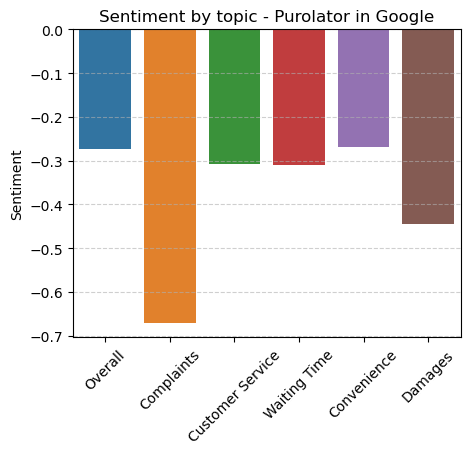

In [15]:
labels = ['Overall', 
          'Complaints', 
          'Customer Service',
          'Waiting Time',
          'Convenience',
          'Damages' 
         ]

data =  [avg_overall_sent, 
         avg_complaint_sent, 
         avg_customer_sent,
         avg_wait_sent,
         avg_convenience_sent,
         avg_damage_sent
         ]

plt.figure(figsize = (5, 4))

sns.barplot(x=labels, y=data)
plt.ylabel('Sentiment')
plt.title('Sentiment by topic - Purolator in Google')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [16]:
percentage_positive_rev = df[df['Sentiment'] > 0].shape[0] / df.shape[0] * 100
percentage_neutral_rev = df[df['Sentiment'] == 0].shape[0] / df.shape[0] * 100
percentage_negative_rev = df[df['Sentiment'] < 0].shape[0] / df.shape[0] * 100

print(f"Percentage of positive reviews: {percentage_positive_rev : .2f}%")
print(f"Percentage of neutral reviews: {percentage_neutral_rev : .2f}%")
print(f"Percentage of negative reviews: {percentage_negative_rev : .2f}%")

Percentage of positive reviews:  31.67%
Percentage of neutral reviews:  0.16%
Percentage of negative reviews:  68.17%


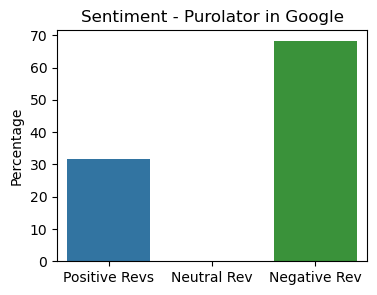

In [17]:
labels = ['Positive Revs', 'Neutral Rev', 'Negative Rev']

data = [percentage_positive_rev, 
        percentage_neutral_rev, 
        percentage_negative_rev]

plt.figure(figsize = (4, 3))

sns.barplot(x=labels, y=data)
plt.ylabel('Percentage')
plt.title('Sentiment - Purolator in Google')
plt.show()

In [18]:
# Top 3 best reviews
df.sort_values(by = 'Sentiment', ascending = False).head(3)

,Reviews,Source,Sentiment,Topic
75,i had a very amazing experience at this purolator location i had a package to send out in a rush i felt a bit frustrated with myself for leaving it to the last minute lashree was the representative that helped me calm down and she reassured me with a very professional and warm attitude that everything was going to be ok i normally just mail things at the post office but this was something very urgent lashree was so knowledgeable of the services there and explained them so well she was extremely quick and efficient and i was out of there in no time feeling confident and happy that i chose to go to purolator and grateful for lashree my package arrived on time so overall an amazing experience,Google reviews,0.9876,0
9,great location right in the middle of the staples super store on university avenue just south of dundas on the east sidestaff are very friendly and helpful and will ensure your package gets to where it needs to be makes shipping super easy great spot,Google reviews,0.9819,0
528,i really wanted to give purolator the benefit of the doubt but ive now had major issues with delivery with them before during and after the recent canada post strike so i dont think it has anything to do with thati dont have a car and love utilizing amazon prime but every time something is shipped through purolator it either doesnt come or they attempt delivery and then make me bus over an hour to get my package at their hawthorne locationi ordered a large package and left a note on the front door of my complex with my buzz number and also made sure to put in on my shipping address i get a message at pm that night stating they attempted delivery earlier when in reality they didnt even bother to try and bring it into the building and didnt leave it at the door of my apartment like i had asked i made sure to leave a nice message on the entryway door of my apartment complex as i wasnt too sure when the package would arrive i now have to bus over an hour and then walk minutes to the pick up spot and then pay for an uber xl which will be over to get this package home because i dont own a vehicle i will also need someone to help me as this package is heavy and dont own a dollyi also have had a package that was supposed to be delivered on november th that has not arrived yet and every day i receive emails from their trackingtracing specialists stating that theyre going to make sure it comes soon its ridiculous this has been almost weeks and every day the tracking information updates to delivery rescheduled for next day the people have been polite in their emails but unfortunately nothing has come out of itother times they have put down a message that they missed me when in reality i have been home all day and didnt get a knock on the door they just dont want to bring it up to my apartment i honestly dont even mind coming downstairs to grab it for them as i understand they probably have a lot of deliveries but this would require them to buzz me or call me so that i can come downstairsi can understand if the package is a day or two late as i know cyber monday and black friday plus holiday shopping has caused an influx of orders but the lack of communication and not even attempting to deliver the product is what really bothers mei am going to start cancelling my prime orders if i see they are being shipped by purolator and maybe this will push amazon to start using a different delivery company,Google reviews,0.9772,0


In [19]:
# Top 3 worst reviews
df.sort_values(by = 'Sentiment', ascending = False).tail(3)

,Reviews,Source,Sentiment,Topic
618,i paid to have a very urgent package delivered in ottawa before am they did not even try to deliver it no delivery van was even close to the building as my daughter was watching the whole time they then do not have a phone number that will be pickedup or customer service that spout anything else than the three lines they learned from the company they just state that no refund will be given and they will not deliver the package this is the worst possible abuse of customersyou do not provide the service you have been paid for so you are stealing my money and my time and i have no recourse they just tell you they are sorry that we feel this way useless company useless customer service and using them leaves a bad taste in my mouth and a feeling off being abused,Google reviews,-0.9821,0
176,i ordered a piece of furniture online through walmartthis order was picked up by purolator on friday february th however the product that i ordered just kept on delaying to be delivered to my home i was told that the first time it didnt deliver was because the order didnt arrive in time for purolator to be picked up i was unhappy because i took work off to stay at home and to wait for the order to arrive after i found out that the weight of the parcel was lbs and they have a policy that it needs two staffs to be on the truckunfortunately it seemed like it was extremely difficult for them to get people on the truck it was very frustrating and caused trouble to get my order deliveredsomeone from the depot contacted me and told me that the only time frame they can deliver the product was on saturday february st from am to pm i am not available on that day i asked to be transferred to the supervisor to see if there were other options after speaking with the supervisor i was beyond disappointed the customer service at purolator from the depot department was totally unacceptable the supervisor that ive spoken to made me feel unpleasant and the attitude was just rude i was told that i didnt understand their rules policies and that my options are limited due to the weight of my parcel i fully understand the reason why my options were limited my concerns were why is it so difficult to get people to be on the truck i was also told that the delivering date on the tracking system doesnt mean it will deliver on that day it sounded as if it was my fault that i took work off and to wait for the parcel it was very frustrating dealing with them the supervisor was attacking and addressing that i have no choice to satisfy my need take it or leave it this particular individual pointed out that walmart is already providing free delivery and free redelivering the item on saturday february st i recommended paying extra fees to get it delivered express since i wont be available on that day however the supervisor told me it was not an option i was the given the option to\thire a mover to pick up the order and to deliver it to my home\tdrive there myself and to pick up my orderit was unbelievable that i was advised to hire a mover as a shipping company they should be ashamed of their business if i need to hire a mover i dont need you the nd option was also very inconvenient for me to travel to kipling since i dont own a vehiclethe supervisor at the depot rudely said to me since you dont mind paying extra money you can hire a mover to come here and pick it up and deliver it to your home people have done that before the tone of voice that was used was unfriendly and i was offended at that point i really dont mind paying extra money to get it delivered it was just very frustrating as i was waiting for my orderluckily i got somoene to deal with this issue i was told that my parcel was not even considered to be overweight it was boxes and each of them was less than lbs the parcel was finally delivered on friday february th and there was actually an option to get it delivered on another day however i had to go through a lot of troublei will 

In [20]:
df_google = df

### From Trustpilot:

In [21]:
# Load the dataset
df = pd.read_csv("purolator_reviews_trustpilot_clean.csv")
df["Source"] = "Trustpilot"
df.rename(columns = {'0':'Reviews'}, inplace = True)
df = df.dropna()

df.sample(3)

,Reviews,Source
4015,"Hello Kerri,\n\nThank you for this feedback. We're sorry to hear that we disappointed you. Can you please email us the tracking number and complete address? We'll schedule another delivery for you.\n\nRegards,\nJames\nSocial Media Coordinator // Customer Care Team // Purolator Inc.\nE-mail: customer.care@purolator.com\nFollow us on Twitter : http://twitter.com/purolatorhelp // Visit us on: www.Purolator.com",Trustpilot
525,"Purolator should close down. It’s an absolute disgrace to call this a “delivery” company when 90% of the time you have to drive to their warehouse.\nThey don’t knock at your door but will claim they stopped, they won’t update the tracking, they delay packages ONLY because they driver is too lazy to pick up a box that is heavier than 10LBS.\nShame on Canada Post for keeping this waste of a company alive",Trustpilot
841,"Hi Mike, thank you for taking the time to write this review. Please let us know if you need any further assistance by emailing us your tracking number. Thank you, Vanessa // Social Media Coordinator // Customer Care Team // Purolator Inc. // E-mail: customer.care@purolator.com // Follow us on Twitter : http://twitter.com/purolatorhelp // Visit us on: www.Purolator.com",Trustpilot


In [22]:
# Applying preprocessing to the 'Reviews' column
df['Reviews'] = df['Reviews'].apply(preprocess_text)

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Applying TF-IDF vectorization
stop_words = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = vectorizer.fit_transform(df['Reviews'])

# Performing topic modeling using LDA
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_matrix = lda_model.fit_transform(tfidf_matrix)

# Finding dominant topic for each review
dominant_topic = lda_matrix.argmax(axis=1)
df['Topic'] = dominant_topic

df.sample(3)

,Reviews,Source,Sentiment,Topic
2380,i had a problem they said they would take care of things and my package was almost sent back because my address was not valid,Trustpilot,0.1280,1
3887,hello eric\n\nthank you for this feedback we apologize for any inconvenience stemming from this incident if youd like us to look into it for you please email us your tracking number\n\nregards\nvincent\nsocial media coordinatorpurolator inccustomer care team\nemail customercarepurolatorcom,Trustpilot,0.8271,0
2781,worst shipping company ever peloton sent me my accessories and used purolator as the delivery company my accessories have been sitting at the sort facility mins from my house for the last two weeks since december i know there are shipping delays but this is unacceptable no help whatsoever,Trustpilot,-0.7003,1


In [23]:
# Complaint analysis
negative_reviews = df[df['Sentiment'] < 0]
complaints = negative_reviews[['Reviews','Sentiment']]

complaints.sample(3)

,Reviews,Sentiment
154,very poor delivery service if i could give stars i would i was expecting to receive my packages however they were left with someone else that i did not give acceptance or clearance to i work during the week so i usually get left the package slip however while i was at work my packages got delivered i live on my own but in a basement the people upstairs took it upon themselves to sign off my packages and leave them outside to be stolen when i did not leave a note saying leave it with someone note they are not my family i dont get why purolator would leave it with some one else that the packages arent meant for,-0.8568
2873,why they do not provide an option to drop the item at door and the pick up location is km away,-0.2732
5047,by far the worst delivery service in canada unreliable unprofessional often late and with poor customer service id trust a team of pack mules to carry my goods over these clowns\n\nif you have the option use literally any other company for your deliveries,-0.8020


In [24]:
# Customer service analysis
customer_service_reviews = df[df['Reviews'].str.contains('service', case=False)]
customer_service_reviews.sample(3)

,Reviews,Source,Sentiment,Topic
4801,order thing from amazon it shipped by purolator it didnot event come to my house but it shows delivery attempted so i have to wait for another weekend worse service,Trustpilot,-0.5859,1
3916,avoid at all cost\nthe worst delivery experience i definitely recommend to avoid this company and use a concurrent company more reliable\n\nonline tracking information is showing on vehicle for delivery from am\ni spent the whole day at home without leaving any second and literally staying\nnext to front to dont miss the delivery but nobody showedup\nand then online tracking information is updated at pm to delivery rescheduled for the next business day because of missed delivery when nobody tried to deliver anything\nits not acceptable to pay for a delivery and having this kind of service,Trustpilot,-0.6934,1
2092,truly the worst experience if i could give negative stars i would i paid for express overnight shipping from north bay to toronto hours it was suppose to arrive thursday it is now saturday and my item has has failed delivery attempts and is now sitting at the depot saying it cannot be delivered this is a cheque for a company and both days they tried delivering it after pm what office is open at pm not to mention i paid for the fast shipping and i spoke with customer service multiple times who assured me they talked to the delivery people and it would arrive yesterday over all this has been the worst experience i have ever had with a shipping company do not offer express shipping if you only intend on taking peoples money and then not shipping the item in a timely manner this cheque needed to be there by yesterday and purolator has screwed me over more than they realize do nooooooootttttt use this shipping company i know i never will again,Trustpilot,-0.9325,1


In [25]:
# User experience analysis
waiting_time_reviews = df[df['Reviews'].str.contains('wait', case=False)]
convenience_reviews = df[df['Reviews'].str.contains('convenient', case=False)]
damages_reviews = df[df['Reviews'].str.contains('damage', case=False)]

waiting_time_reviews.sample(3)

,Reviews,Source,Sentiment,Topic
2204,honestly one of the worst company experiences ive ever encountered my delivery has now been withheld from me for a th day in a row first day i made arrangements to be home during the specific time they told me for some reason there were errors and it couldnt be delivered second day driver had it in the wrong truck same thing happened third day i told them i would pick it up in office to avoid this delivery problem again it wasnt there driver arrived at the destination to drop it off so that i could pick it up at an office and he was minutes early before the store opened so he left now they are saying no guarantees itll be in by tonight or tomorrow oh and also good luck getting through to customer service you will be waiting a minimum of hour to get through,Trustpilot,-0.8360,1
2479,this is the worst shipping experience i ever had\ni order a computer part off amazon and i pay express because my computer is fried and i need that part to be able to work keep in mind as a self employed entrepreneur in a pandemic work is very scarce and i cant effort to miss deadlines and lose contracts\n\nmy delivery was scheduled for tuesday morning around noon i get an email telling me my package couldnt be delivered because my street is closed my street is not closed i got a package from intelcom and from canada post the very same morning but there is construction on the corner so i understand it might be a little confusing even tho every other delivery service never missed a delievery so i call and explain the situation the person understood and put a note to the driver and even left my phone number if hes confused she guaranteed my delievery would be there in the morning\nits kinda messing with my deadlines but its ok ill manage\n\nday around noon i get an email saying the same thing i call again explain again my street is not closed the person called dispatch and guaranteed the truck would come back around pm\npmnothing\ni call again keep in mind its min on hold everytime you call the person told me the driver is late and guaranteed he would be there before pm\npmnothing\ni call again now they transfer me to a superior very nice lady she understand that the driver is an idiot and have no respect for his job or the clients she said i could pickup the package at distribution center i drive min over there only to be told the package is in the truck and they cant give it to me\ni call back the supervisor and she guaranteed the package would be there first thing in the morning i even get an email saying the resolved the issue with the driver\n\nthis morning i get an email at noon telling me the driver cant access my streeti call again this time i speak with a super arrogant supervisor who tells me that my adress is not good and he cant do anything for me that im not allowed to come pick it up and that i need to contact the sender and hangs up\ni call the sender its a full voicemail i cant do anything\nlater the same lady as the day before calls me and tell me that the other supervisor was basicly telling bullsht to get rid of me and that i needed to come pickup my package at the distribution center before the curfew at pm\nso drove another hour to pick up my package\n\ni spent more than hrs waiting on the phone had to drive for hrs ended up losing a contract because i couldnt meet the deadlineand i couldnt get a refund for my shipping\n\ndo yourself a favor and never ever deal with purolator,Trustpilot,0.2321,1
250,i have been waiting for the whole day at my place for my shipment to arrive i didnt go to work today waiting for my shipment i kept on looking at the tracking updates and the last update i got was at pm on feb saying the shipment was on the vehicle for delivery well i got tired of waiting and left the house to run some errands to my surprise i have just checked now at pm the purolator app and it reads there was an attempted delivery at \nwell purolator first of all i never received a damn phone call

In [26]:
convenience_reviews.sample(3)

,Reviews,Source,Sentiment,Topic
4103,i am experiencing a ridiculous delay in my shipment which was okay if was just a delay due to pandemic but rather it has attempted for delivery for times now and the drivers could not find the place they have been leaving false status online saying i wasnt home to collect the delivery firstly i was home all times and secondly my shipment did not even required any signatures so they could have left it on my door this is so inconvenient for mei paid delivery charges so i can have the ease of coming it to me but rather i am spending hours in call waiting them to pick up and raise my concern over and over,Trustpilot,-0.7331,1
4700,purolator has screwed me on the last two deliveries i was supposed to get the first one was attempted at my house the driver left the door knocker with only the driver id and the location where i was supposed to pick it up there was no tracking information nor a name for who the package belonged to i waited the day before going to pick it up where they said it was dropped off when i got there there was no package for me i called purolator and first they told me it was delivered it was just on my step ok fool me once i went home and immediately checked no package called back and they said it was actually dropped off at a different location the lady told me to leave a note on my door with all of the information they eventually gave me the correct tracking info and the driver will leave the package at my door i got home the next day still no package look online for the tracking info it didnt even make it on the truck so i had to drive to their main depot to pick it up which is not in a convenient location the next delivery they were supposed to make it says they had an error in the system and the package didnt get put on the truck and the depot is closed no option for pickup too late on a friday night the next day saturday it says it is on the truck being delivered wait all day check tracking every hour or so finally get updated that the driver was unable to deliver because there was some traffic issue preventing them from making it at all called the customer service number and told them just to leave it at the main depot and i will make the trek in two days to pick it up they put it on a truck on monday anyways try to deliver i guess i should have checked the tracking info again on monday my fault i get to the depot and they say they dont have it and it was attempted delivery there should be a door sticker on my door and can i come back tomorrow i am done with this company every order i place i will request not to send purolator even if i need to wait an extra day or two much better than dealing with this hassle all over again,Trustpilot,-0.9413,1
3311,they missed me even though i was home and would have heard a knock or doorbell now i have to wait whole days for the authorized shipping agent to receive the package or something so i can pick it up from this random store maybe im too used to the fedex or other shipping companies that would just be sent to my local post office where i could sign it off and is a minute drive from my house the worst part is they wont even deliver it after the days wait i have to drive minutes there and minutes back just very inconvenient and i dont understand why this is so complicated,Trustpilot,-0.8399,1


In [27]:
damages_reviews.sample(3)

,Reviews,Source,Sentiment,Topic
1010,horrible experience i ordered a product on may th the package was meant to be delivered on may st at around am the tracker mentioned it was on a vehicle for delivery then was later updated around pm with attempted delivery packaging issue so no delivery driver showed up at my door which i wouldve been aware of as i have two very loud dogs and was watching for them all day\n\nafter trying to call purolator to figure this out i was on hold for about minutes without an answer that hold song is infuriating next tried to use the online chat which was also a nightmare as it did not work with google chrome or microsoft edge and finally worked with firefox to talk to a person you have to explicitly tell the bot that youd like to speak to a person multiple times\n\nfinally once i was connected to a real person after giving them some sensitive information they told me that the package wasnt able to be delivered due to damage they mentioned that this would be sorted out by purolator soon and would update the tracker\n\nthat same night at around pm the tracker was updated with resolution required shipment refused then the following morning the tracker was updated at am with the same message\n\nafter speaking with the online chat again i was told that i personally had declined the package because i deemed the package damaged how could i have possibly denied the package if i never saw the package because it was never attempted to be delivered to my home\n\nwhats going on here purolator did your driver assume that no one was home because there werent any vehicles in the driveway and skip delivering to my home and then give some bogus excuse as to why it wasnt delivered i was also denied the ability to go in and pick up my package in person the online chat said there was no possible way for me to pick it up in person they also told me that id have to reach out to my seller to get them to issue a replacement\n\nwhy is it that your driver did not attempt to deliver then lied about me saying the package was damaged why was i denied access to view my package and see if it is damaged or not if the box is damaged i could care less now i have to go through my seller and go through this entire waiting process again the seller also told me to pick up the replacement in person at purolator but the problem is purolator already said this wasnt possible\n\ndo better purolator its actually sad how horrible this experience has been my packages from across the world in china which was ordered after my package with purolator made it to my home before purolator could deliver a package that is minutes away from my home\n\nid honestly give stars if i could,Trustpilot,-0.9810,1
5596,hello noel\n\ni truly apologize that your item was damaged i understand your concerns and appreciate you taking the time to write this please email us with your tracking number at customercarepurolatorcom so we can forward your complaint to the depots management\n\nkind regards\n\nvanessa\ncustomer care team\ncoordinator social media testing\nwwwpurolatorcom,Trustpilot,0.8866,0
2109,garbage company terrible customer service packages containing high value items arrived late since january completely utterly annihilated just destroyed nigh unrecognizable their customer service seems indignant that youre angry over items costing s of dollars being unusable and having to go through claims processes causing weeks or months of downtime if i had the authority to shut down this disgraceful herd of apathetic turds for what should be considered criminal property damage and utter negligence i would ive already told suppliers if they use purolator to ship im done doing business with them full stop if you have any sense at all youll do the same\n\nresponse to their reply below ive already been through your nonassistance excuse line to add insult to injury note the same generic response they slap onto every negative review thanks for proving my point,Trustpilot,-

In [28]:
avg_overall_sent     = df['Sentiment'].mean()
avg_complaint_sent   = complaints['Sentiment'].mean()
avg_customer_sent    = customer_service_reviews['Sentiment'].mean()
avg_wait_sent        =  waiting_time_reviews['Sentiment'].mean()
avg_convenience_sent = convenience_reviews['Sentiment'].mean()
avg_damage_sent      = damages_reviews['Sentiment'].mean()

# Output
print(f"Overall Sentiment: { avg_overall_sent : .4f}")
print(f"Complaints: { avg_complaint_sent : .4f}")
print(f"Customer Service Reviews: { avg_customer_sent : .4f}")
print(f"Waiting Time Reviews: { avg_wait_sent : .4f}")
print(f"Convenience Reviews: { avg_convenience_sent : .4f}")
print(f"Damages Reviews: { avg_damage_sent : .4f}")

Overall Sentiment:  0.1256
Complaints: -0.6722
Customer Service Reviews: -0.3086
Waiting Time Reviews: -0.3624
Convenience Reviews: -0.3888
Damages Reviews: -0.3339


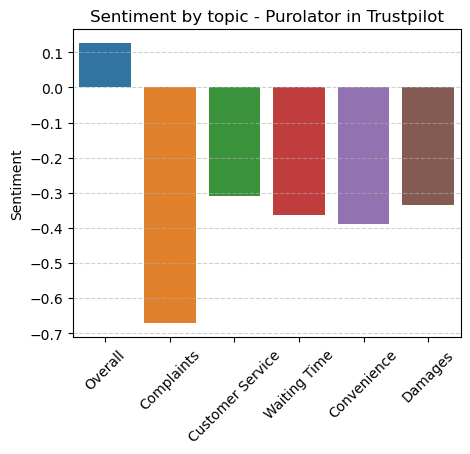

In [29]:
labels = ['Overall', 
          'Complaints', 
          'Customer Service',
          'Waiting Time',
          'Convenience',
          'Damages' 
         ]

data =  [avg_overall_sent, 
         avg_complaint_sent, 
         avg_customer_sent,
         avg_wait_sent,
         avg_convenience_sent,
         avg_damage_sent
         ]

plt.figure(figsize = (5, 4))

sns.barplot(x=labels, y=data)
plt.ylabel('Sentiment')
plt.title('Sentiment by topic - Purolator in Trustpilot')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [30]:
percentage_positive_rev = df[df['Sentiment'] > 0].shape[0] / df.shape[0] * 100
percentage_neutral_rev = df[df['Sentiment'] == 0].shape[0] / df.shape[0] * 100
percentage_negative_rev = df[df['Sentiment'] < 0].shape[0] / df.shape[0] * 100

print(f"Percentage of positive reviews: {percentage_positive_rev : .2f}%")
print(f"Percentage of neutral reviews: {percentage_neutral_rev : .2f}%")
print(f"Percentage of negative reviews: {percentage_negative_rev : .2f}%")

Percentage of positive reviews:  56.81%
Percentage of neutral reviews:  1.60%
Percentage of negative reviews:  41.59%


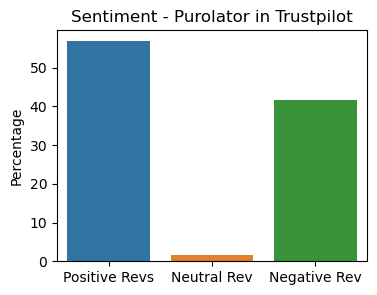

In [31]:
labels = ['Positive Revs', 'Neutral Rev', 'Negative Rev']

data = [percentage_positive_rev, 
        percentage_neutral_rev, 
        percentage_negative_rev]

plt.figure(figsize = (4, 3))

sns.barplot(x=labels, y=data)
plt.ylabel('Percentage')
plt.title('Sentiment - Purolator in Trustpilot')
plt.show()

In [32]:
# Top 3 best reviews
df.sort_values(by = 'Sentiment', ascending = False).head(3)

Reviews  \
3620  my shipment got lost i called purolator at pm the phone call lasted  and the majority of time i was on hold just like the warning and apology at the beginning of message for the anticipated delay due to new safety standards trying to keep their employees safe and handling the increased capacity so my entitled ass can get my stuff\ni find the companies need to be cognizant of their employees safety so they can return home to their families somewhat inconvenient but i guess they have a right to go home and enjoy their families and stuff too\ni joked about the delay when the girl first answered and she chuckled and sincerely apologized for the wait and i advised her i was prepared for the wait as they had told me this at the beginning of the call and was enjoying a beverage outside and enjoying the beautiful day and advised that i may be changing to a big boy drink soon she was a sweet and kind person and i enjoyed chatting with her and she suggested a few solutions there was an urgency to receive the package as the company that makes my stuff also has concerns about their employees lives and was a little backed up too what audacity these companies have expecting me to be rational and allow extra time to get my stuff so they can avert the possible death of one of their employees the girl cautioned that it could take up to  hours to get my stuff due to procedural issues of handling peoples stuff that may be contaminated with a lethal pathogen i was going to advise her that i am a very important person and want my stuff when i want my stuff but she was very sweet and i could not find it in my stone heart to assert my demands as an entitled person\nat  i received an email notice that they were beginning to try to find a rather large truck where they suspect my stuff might be i noted from the email that they were located in new brunswick and replied that was likely why they were so kind the maritimes and newfoundland have the kindest and most generous people on the planet they have way less stuff than us important people but they will give you what they have if you need it more than they do btw great place to visit\nat pm my important stuff was delivered\ni had not slept well the last  days waiting for my stuff and now my stuff was inferior to the stuff they had shipped before but it was still better than everyone elses stuff so i guess i will need set them straight because i deserve the best stuff if i have time i will write a scathing review of their company too however finally having my stuff made for a good nights sleep so thank you purolator for the good night sleep\nnot sure if me being kind to kind people precipitated the express delivery but i think i read somewhere about treating others the way you would like to be treated and it had some type of benefit so i thought i might just try it now as a systems engineer i can tell you that the logistics of locating a parcel from a few thousand kilometres away in such a prompt and reliable way is pretty much top of the heap for those of you that can not comprehend remember how frustrating it was when you lost your keys now think how hard it would be if those keys were lost amongst a million similar keys and you had to read a  digit code on each one to find your keys now i have heard rumours of a virus that may be inserting a new feedback path to an already complex and sophisticated system and this may at times make the system metastable that means you are trying to find your keys in the pile of keys with your hands tied behind you back while important people are kicking you in the a\nin closing i am eagerly awaiting purolator to lose my stuff again so i can have another enjoyable experience dealing with purolator customer service\nhopefully they will take longer next time so i can enjoy my pleasant experience a bit longer hopefully i will not need to go to work later that day so i can kick back and enjoy a few big boy drinks in the outdoors of the beautiful country t

In [33]:
# Top 3 worst reviews
df.sort_values(by = 'Sentiment', ascending = False).tail(3)

,Reviews,Source,Sentiment,Topic
2066,im totally disappointed with purolator service and will never recommend anyone to use your service i had a package delivered by purolator and that hasnt reached me yet last fridayst may the shipment came to my place but returned due to a missing entry code i confirmed the address right away by calling a customer service agentafter waiting min he assured me the package will arrive tuesdayth may it didnt arrive rather online tracking updated as missing aptunit numberhow funny i was pissed off and chose the pickup option with the help of your chat bot later i realised its not safe to go outside in the covid situation then again i called the customer service to ask for an update now after waiting minutes she said the driver missed the apt number i again confirmed my address entry code and everything and told her to change it from pick up to delivery to my place she updated and confirmed with me of the change today morningth may i saw the address incorrect notification again in the online tracking i called the customer service again and waited for more than hour to get hold she told me that there is an incorrect address and the package is going to the pickup point i laughed at that kind of pathetic service as none of my previous updates worked i wonder if they dont encourage a second attempt to the same address it would be nice for the customers if they had mentioned beforehand that they dont pay a visit to an address twice or they could have updated the online tracker to pick up once the st attempt missed anyways seeing a lot of negative reviews im pretty sure you dont care about the customer complaints and hence my complaint would go in vain but as i wasted my money paying for their service i dont want anyone else to waste their time and money after purolator they are just pathetic pathetic pathetic,Trustpilot,-0.9945,1
1367,seriously i paid for next day delivery they got the package december th with delivery scheduled for december th i was in a bad car accident so i cant move too fast so i spent all day in my kitchen waiting so i wouldnt miss the driver at pm i went out to make sure the chickens and goats are away and put my garbage out for next day and found a note on my gate less than yards from my front door stating they were unable to do delivery really you could easily see my house and the lights were all on thats bs that i wasnt available i called and asked w t f happened and told them there was no way i could drive min to pick up package from airport just because their driver didnt want to do hisher dammed job they said they were sorry but since it was friday they wont be able to do redelivery until monday fine total bs but ill patiently wait i waited all monday in my kitchen but no attempt was made i also had been getting emails every day since friday evening saying my package would be waiting for days i called saturday to see if they first agent screwed up but according to person on phone its an automated system and they will put a note but the emails came every day there was no change on package being at airport waiting for pickup even though i called every day that week to ask whats going on exactly a week later on the next friday i got a call from an k radio number im in british columbia that i missed and called right back and texted back with no reply i still dont know who called but to be nice lets say it was the drivermaybe purolator site updated to say attempt was made it wasnt it had snowed and i went out to check but there was no footprints or tier marks in my driveway near my gate or even on the street at my mailbox so no attempt was made to even come down my street i called and asked wth is going on rush next day delivery a week later there was only one attempt made the following week still no package and yesterday weeks later the site updated that my package was out for delivery want to take a guess what happened nothing the website didnt even update to say unable to deli

In [34]:
df_trustpilot = df

### From Reddit:

In [35]:
# Load the dataset
df = pd.read_csv("Reviews_reddit_purolator.csv")
df["Source"] = "Reddit"
df = df.dropna()
df.head(3)

,Reviews,Source
0,Purolator after 5 days hold,Reddit
1,30 workers at Purolator distribution centre in Calgary test positive for COVID-19,Reddit
2,Purolator Service Delay,Reddit


In [36]:
# Applying preprocessing to the 'Reviews' column
df['Reviews'] = df['Reviews'].apply(preprocess_text)

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Applying TF-IDF vectorization
stop_words = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = vectorizer.fit_transform(df['Reviews'])

# Performing topic modeling using LDA
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_matrix = lda_model.fit_transform(tfidf_matrix)

# Finding dominant topic for each review
dominant_topic = lda_matrix.argmax(axis=1)
df['Topic'] = dominant_topic

df.sample(3)

,Reviews,Source,Sentiment,Topic
20,is this typical with purolator,Reddit,0.0000,1
2,purolator service delay,Reddit,-0.3182,2
21,purolator hotpotato,Reddit,0.0000,1


In [37]:
# Complaint analysis
negative_reviews = df[df['Sentiment'] < 0]
complaints = negative_reviews[['Reviews','Sentiment']]
complaints.sample(3)

,Reviews,Sentiment
14,what the fuck purolator,-0.5423
11,purolator screw up who is supposed to pay,-0.2023
16,what does it mean attempted delivery refused due to issue with order,-0.2960


In [38]:
# Customer service analysis
customer_service_reviews = df[df['Reviews'].str.contains('service', case=False)]

# User experience analysis
waiting_time_reviews = df[df['Reviews'].str.contains('wait', case=False)]
convenience_reviews = df[df['Reviews'].str.contains('convenient', case=False)]
damages_reviews = df[df['Reviews'].str.contains('damage', case=False)]

In [39]:
customer_service_reviews.sample()

,Reviews,Source,Sentiment,Topic
2,purolator service delay,Reddit,-0.3182,2


In [40]:
avg_overall_sent     = df['Sentiment'].mean()
avg_complaint_sent   = complaints['Sentiment'].mean()
avg_customer_sent    = customer_service_reviews['Sentiment'].mean()
avg_wait_sent        =  waiting_time_reviews['Sentiment'].mean()
avg_convenience_sent = convenience_reviews['Sentiment'].mean()
avg_damage_sent      = damages_reviews['Sentiment'].mean()

# Output
print(f"Overall Sentiment: { avg_overall_sent : .4f}")
print(f"Complaints: { avg_complaint_sent : .4f}")
print(f"Customer Service Reviews: { avg_customer_sent : .4f}")
print(f"Waiting Time Reviews: { avg_wait_sent : .4f}")
print(f"Convenience Reviews: { avg_convenience_sent : .4f}")
print(f"Damages Reviews: { avg_damage_sent : .4f}")

Overall Sentiment: -0.0267
Complaints: -0.4150
Customer Service Reviews: -0.3182
Waiting Time Reviews:  nan
Convenience Reviews:  nan
Damages Reviews:  nan


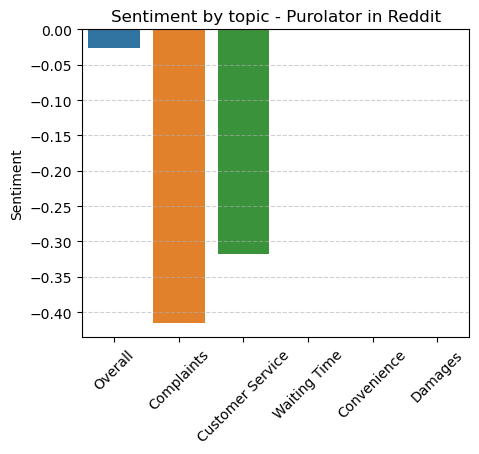

In [41]:
labels = ['Overall', 
          'Complaints', 
          'Customer Service',
          'Waiting Time',
          'Convenience',
          'Damages' 
         ]

data =  [avg_overall_sent, 
         avg_complaint_sent, 
         avg_customer_sent,
         avg_wait_sent,
         avg_convenience_sent,
         avg_damage_sent
         ]

plt.figure(figsize = (5, 4))

sns.barplot(x=labels, y=data)
plt.ylabel('Sentiment')
plt.title('Sentiment by topic - Purolator in Reddit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [42]:
percentage_positive_rev = df[df['Sentiment'] > 0].shape[0] / df.shape[0] * 100
percentage_neutral_rev = df[df['Sentiment'] == 0].shape[0] / df.shape[0] * 100
percentage_negative_rev = df[df['Sentiment'] < 0].shape[0] / df.shape[0] * 100

print(f"Percentage of positive reviews: {percentage_positive_rev : .2f}%")
print(f"Percentage of neutral reviews: {percentage_neutral_rev : .2f}%")
print(f"Percentage of negative reviews: {percentage_negative_rev : .2f}%")

Percentage of positive reviews:  22.73%
Percentage of neutral reviews:  45.45%
Percentage of negative reviews:  31.82%


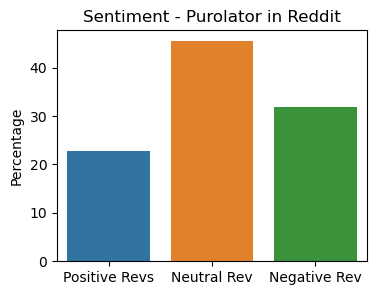

In [43]:
labels = ['Positive Revs', 'Neutral Rev', 'Negative Rev']

data = [percentage_positive_rev, 
        percentage_neutral_rev, 
        percentage_negative_rev]

plt.figure(figsize = (4, 3))

sns.barplot(x=labels, y=data)
plt.ylabel('Percentage')
plt.title('Sentiment - Purolator in Reddit')
plt.show()

In [44]:
# Top 3 best reviews
df.sort_values(by = 'Sentiment', ascending = False).head(3)

,Reviews,Source,Sentiment,Topic
18,help anybody work for purolator here can you please dm mei need assistance and it is really urgent,Reddit,0.7264,0
1,workers at purolator distribution centre in calgary test positive for covid,Reddit,0.5574,1
19,is ups better than purolator,Reddit,0.4404,0


In [45]:
# Top 3 worst reviews
df.sort_values(by = 'Sentiment', ascending = False).tail(3)

,Reviews,Source,Sentiment,Topic
9,my k laptop got stolen by most likelly a purolator employee,Reddit,-0.4939,1
14,what the fuck purolator,Reddit,-0.5423,1
12,purolator what if we made canada post but worse,Reddit,-0.6310,2


In [46]:
df_reddit = df

In [47]:
df = pd.concat([df_google, df_trustpilot, df_reddit], ignore_index = True)

In [48]:
df.to_csv('Purolator consolidated.csv', index = False)